In [1]:
import glob
import csv
import pandas as pd
import numpy as np

#MY ATTEMPT ON TRYING TO MAKE IT EFFICENT EVEN THOUGH ITS BS
# AvgTable = pd.read_csv('./test.csv', index_col='Name')
# #adds new column
# AvgTable['Times_played'] = 1

# #Loading and Parsing
# for file in glob.glob('./*.csv'):
#     table = pd.read_csv(file, index_col='Name')
#     for i, r in table.iterrows():
#         if(i in AvgTable.index):
#             AvgTable.loc[i,'Times_played']+=1
#             timesPlayed = AvgTable.loc[i,'Times_played']
#             for column in table:
#                 AvgTable.loc[i,column]*=(timesPlayed-1)
#                 AvgTable.loc[i,column]+=table.loc[i,column]
#                 AvgTable.loc[i,column]/=(timesPlayed)
#         else:
#             AvgTable.append(table.loc[i])
#             AvgTable.loc[i,'Times_played']=1
# print(AvgTable)            
# AvgTable.head()

In [2]:
#Summing all the csv files and just meaning by subgroup defined by name
#SumTable = pd.read_csv('data/tour_1_result_0.csv')
list_ = []
for file in glob.glob('data/tour*result*.csv'):
    table = pd.read_csv(file)
    list_.append(table)
SumTable = pd.concat(list_, ignore_index=True)
AvgTable = SumTable.groupby('Name').mean()


AvgTable['present'] = 0  # make new column

AvgTable.sort_values(['Rank'])

,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate,present
Name,,,,,,,,,,,,,,
Evolved HMM 5,1.249754,2.834766,0.749035,4.718289,1.000000,0.694606,0.054429,0.124995,0.125970,0.998268,0.522902,0.054178,0.217944,0
EvolvedLookerUp2_2_2,1.313079,2.840152,0.749263,5.234295,1.000000,0.673057,0.076207,0.142561,0.108175,0.877164,0.471200,0.594613,0.817182,0
Evolved FSM 16,1.324873,2.847028,0.745944,6.304569,1.000000,0.653080,0.092864,0.158433,0.095622,0.863322,0.565305,0.567677,0.409358,0
Evolved FSM 16 Noise 05,1.492929,2.845750,0.744989,3.951010,1.000000,0.712987,0.032002,0.112945,0.142066,0.982848,0.564512,0.465114,0.125808,0
PSO Gambler 2_2_2,1.633268,2.819171,0.723734,4.698444,1.000000,0.651531,0.072203,0.147078,0.129188,0.917012,0.476997,0.538871,0.422383,0
Evolved ANN,1.676295,2.826161,0.755508,4.086653,1.000000,0.721466,0.034042,0.104318,0.140174,0.981743,0.743563,0.449043,0.000000,0
Evolved ANN 5,2.219758,2.800719,0.764525,3.981855,1.000000,0.729396,0.035130,0.094264,0.141210,0.964765,0.730559,0.221465,0.000000,0
"BackStabber: (D, D)",2.250245,2.780284,0.701598,17.757115,1.000000,0.670689,0.030909,0.117454,0.180949,0.985566,0.803997,0.000000,0.000000,0
Fool Me Once,2.258230,2.795641,0.678238,5.399177,1.000000,0.660689,0.017548,0.122953,0.198809,1.000000,0.582847,0.000000,0.000000,0


In [3]:
m = len(list_)
m


10000

In [4]:
np.asarray([[1, 2], [3, 4]])[:, :, None]


array([[[1],
        [2]],

       [[3],
        [4]]])

In [5]:
AvgTable['present'] = 1

# create a bunch of training data, each of which only has rows of the participating players
# takes a few minutes to run

x_train = [pd.DataFrame(0, index=AvgTable.index, columns=AvgTable.columns) for i in range(m)]

for i in range(m):
    x_train[i].loc[list_[i]['Name']] = AvgTable.loc[list_[i]['Name']]
    
x_train[3]

,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate,present
Name,,,,,,,,,,,,,,
$\phi$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
$\pi$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
$e$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
ALLCorALLD,17.462761,2.170157,0.598627,8.600298,0.598627,0.467443,0.131184,0.091614,0.309759,1.000000,1.000000,0.00000,0.000000,1
Adaptive,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
Adaptive Pavlov 2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
Adaptive Pavlov 2011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
Adaptive Tit For Tat: 0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
Aggravater,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0


In [6]:
x_train = np.array([np.array(x) for x in x_train])
x_train.shape

(10000, 231, 14)

In [17]:
#y_train = np.any(x_train, axis=-1)  # binary for which strategies are present ;; dosen't work with finding top 5

y_train = [pd.DataFrame(0, index=AvgTable.index, columns=['Rank']) for i in range(m)]

for i in range(m):
    y_train[i].loc[list_[i][list_[i]['Rank'] < 3]['Name']] = 1

y_train[3]

y_train = np.array([np.array(y).flatten() for y in y_train])

In [20]:
y_train[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
x_train.shape, y_train.shape

((10000, 231, 14), (10000, 231))

In [10]:


print(AvgTable.index) 
tournamentNumber=0


Index(['$\phi$', '$\pi$', '$e$', 'ALLCorALLD', 'Adaptive',
       'Adaptive Pavlov 2006', 'Adaptive Pavlov 2011',
       'Adaptive Tit For Tat: 0.5', 'Aggravater', 'Alexei: (D,)',
       ...
       'ZD-Extort-2 v2: 0.125, 0.5, 1', 'ZD-Extort-2: 0.1111111111111111, 0.5',
       'ZD-Extort-4: 0.23529411764705882, 0.25, 1',
       'ZD-Extort3: 0.11538461538461539, 0.3333333333333333, 1',
       'ZD-Extortion: 0.2, 0.1, 1', 'ZD-GEN-2: 0.125, 0.5, 3',
       'ZD-GTFT-2: 0.25, 0.5', 'ZD-Mem2', 'ZD-Mischief: 0.1, 0.0, 1',
       'ZD-SET-2: 0.25, 0.0, 2'],
      dtype='object', name='Name', length=231)


In [11]:
x_train = x_train.reshape(10000, 231*14)

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *
from keras.callbacks import *

#basic sequenctial keras NN model with 2 layers.
#Input are vectors of strategies that participate in the tournament
#Output is prediction of 1 hot vector representing the 3 most dominant strategies in the tournament
model = Sequential()

model.add(Dense(units=400, activation='relu', input_dim=3234))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=231, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), 
                    validation_split=0.2, 
                    epochs=5000, 
                    verbose=1, 
                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')],
                    batch_size=50)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5000
8000/8000 [==============================] - 3s 317us/step - loss: 15.9266 - acc: 0.0206 - val_loss: 14.8279 - val_acc: 0.0465
Epoch 2/5000
8000/8000 [==============================] - 2s 258us/step - loss: 14.1956 - acc: 0.0671 - val_loss: 13.9777 - val_acc: 0.0750
Epoch 3/5000
8000/8000 [==============================] - 2s 227us/step - loss: 13.5112 - acc: 0.1052 - val_loss: 13.5616 - val_acc: 0.1135
Epoch 4/5000
8000/8000 [==============================] - 2s 232us/step - loss: 13.0694 - acc: 0.1409 - val_loss: 13.2537 - val_acc: 0.1530
Epoch 5/5000
8000/8000 [==============================] - 2s 255us/step - loss: 12.7032 - acc: 0.1720 - val_loss: 12.9965 - val_acc: 0.1730
Epoch 6/5000
8000/8000 [==============================] - 2s 264us/step - loss: 12.3783 - acc: 0.1979 - val_loss: 12.7655 - val_acc: 0.1780
Epoch 7/5000
8000/8000 [==============================] - 2s 271us/step - loss: 12.0743 - acc: 0.2116 - val_loss

8000/8000 [==============================] - 2s 270us/step - loss: 5.0074 - acc: 0.3611 - val_loss: 7.3997 - val_acc: 0.3010
Epoch 60/5000
8000/8000 [==============================] - 2s 265us/step - loss: 4.9724 - acc: 0.3645 - val_loss: 7.3986 - val_acc: 0.2980
Epoch 61/5000
8000/8000 [==============================] - 2s 264us/step - loss: 4.9420 - acc: 0.3623 - val_loss: 7.3768 - val_acc: 0.2905
Epoch 62/5000
8000/8000 [==============================] - 2s 265us/step - loss: 4.9103 - acc: 0.3590 - val_loss: 7.3755 - val_acc: 0.2965
Epoch 63/5000
8000/8000 [==============================] - 2s 259us/step - loss: 4.8792 - acc: 0.3641 - val_loss: 7.3684 - val_acc: 0.2975
Epoch 64/5000
8000/8000 [==============================] - 2s 246us/step - loss: 4.8497 - acc: 0.3584 - val_loss: 7.3627 - val_acc: 0.2940
Epoch 65/5000
8000/8000 [==============================] - 2s 262us/step - loss: 4.8227 - acc: 0.3646 - val_loss: 7.3707 - val_acc: 0.3025
Epoch 66/5000
8000/8000 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


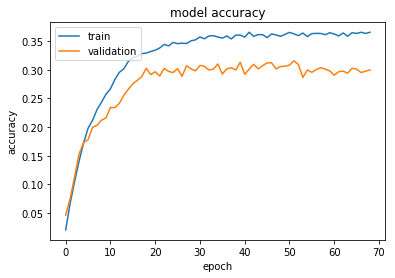

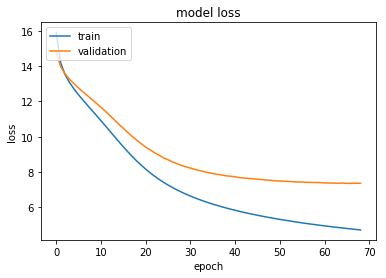

In [39]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
#logistic regression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *
from keras.callbacks import *

#basic sequenctial keras NN model with 2 layers.
#Input are vectors of strategies that participate in the tournament
#Output is prediction of 1 hot vector representing the 3 most dominant strategies in the tournament
model = Sequential()

model.add(Dense(units=231, activation='softmax', input_dim=3234))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), 
                    validation_split=0.2, 
                    epochs=5000, 
                    verbose=1, 
                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')],
                    batch_size=50)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5000
8000/8000 [==============================] - 2s 226us/step - loss: 17.7109 - acc: 0.0459 - val_loss: 15.7936 - val_acc: 0.0810
Epoch 2/5000
8000/8000 [==============================] - 1s 149us/step - loss: 14.3288 - acc: 0.1264 - val_loss: 13.8068 - val_acc: 0.1455
Epoch 3/5000
8000/8000 [==============================] - 1s 141us/step - loss: 12.5504 - acc: 0.1938 - val_loss: 12.5070 - val_acc: 0.2040
Epoch 4/5000
8000/8000 [==============================] - 1s 136us/step - loss: 11.3243 - acc: 0.2520 - val_loss: 11.5638 - val_acc: 0.2460
Epoch 5/5000
8000/8000 [==============================] - 1s 137us/step - loss: 10.4114 - acc: 0.2949 - val_loss: 10.8418 - val_acc: 0.2765
Epoch 6/5000
8000/8000 [==============================] - 1s 151us/step - loss: 9.7016 - acc: 0.3181 - val_loss: 10.2683 - val_acc: 0.3025
Epoch 7/5000
8000/8000 [==============================] - 1s 160us/step - loss: 9.1299 - acc: 0.3361 - val_loss: 

8000/8000 [==============================] - 1s 154us/step - loss: 4.7289 - acc: 0.3743 - val_loss: 6.3866 - val_acc: 0.3400
Epoch 60/5000
8000/8000 [==============================] - 1s 154us/step - loss: 4.7149 - acc: 0.3724 - val_loss: 6.3830 - val_acc: 0.3385
Epoch 61/5000
8000/8000 [==============================] - 1s 154us/step - loss: 4.7017 - acc: 0.3774 - val_loss: 6.3785 - val_acc: 0.3380
Epoch 62/5000
8000/8000 [==============================] - 1s 154us/step - loss: 4.6888 - acc: 0.3715 - val_loss: 6.3728 - val_acc: 0.3420
Epoch 63/5000
8000/8000 [==============================] - 1s 143us/step - loss: 4.6763 - acc: 0.3746 - val_loss: 6.3694 - val_acc: 0.3405
Epoch 64/5000
8000/8000 [==============================] - 1s 139us/step - loss: 4.6643 - acc: 0.3709 - val_loss: 6.3662 - val_acc: 0.3375
Epoch 65/5000
8000/8000 [==============================] - 1s 134us/step - loss: 4.6526 - acc: 0.3716 - val_loss: 6.3621 - val_acc: 0.3405
Epoch 66/5000
8000/8000 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


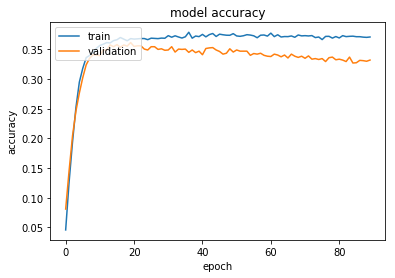

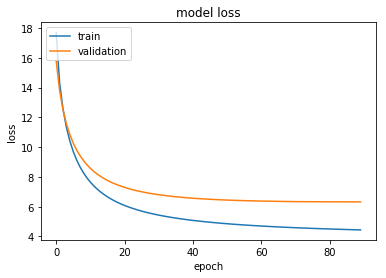

In [41]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()